## Урок 4

### Непрерывные случайные величины. 

### Функция распределения и плотность распределения вероятностей. 

### Равномерное и нормальное распределение. Центральная предельная теорема

**Непрерывная случайная величина** может принимать все возможные значения, содержащиеся на промежутке, который может быть как конечным (ограниченным), так и бесконечным.

**Функция распределения вероятностей** — это функция $F(x)$, которая для каждого значения $x$ показывает, какова вероятность того, что случайная величина меньше $x$.

**Плотность распределения вероятностей** — это функция $f(x)$, которая равна производной функции распределения вероятностей:

$$f(x) = F'(x)$$

#### Равномерное распределение

Распределение вероятностей случайной величины $X$ в зависимости от плотности:

$$f(x) = \begin{cases} 0, если \; x \le a; \\ \frac{1}{b - a}, если \; a < x \le b; \\ 0, \; если \; x > b. \end{cases}$$

Математическое ожидание $M(X)$ равномерно распределенной непрерывной случайной величины можно вычислить по формуле:

$$M(X) = \frac{a + b}{2}$$

По следующей формуле можно рассчитать дисперсию $D(X)$:


$$D(X) = \frac{(b - a)^2}{12}$$

Посмотрим на график плотности равномерного распределения:

<img src='https://ru.files.fm/thumb_show.php?i=4whssuky&view' width=500>Рис. 1 График плотности равномерного распределения</img>

График функции равномерного распределения:

<img src='https://ru.files.fm/thumb_show.php?i=fwy7dghu&view' width=500>Рис. 2 График функции равномерного распределения</img>

#### Нормальное распределение

Нормальное распределение — это распределение вероятностей непрерывной случайной величины $X$, плотность вероятности которой подчиняется формуле:

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e ^ {- \frac{(x - a)^2}{2 \sigma^2}},$$

---



где $a = M(X), \; \sigma^2 = D(X).$

График плотности нормального распределения имеет колоколообразную форму:

<img src='https://ru.files.fm/thumb_show.php?i=wmq8yuhw&view' width=500> </img> Рис 3. График плотности нормального распределения

Примеры нормально распределенных величин: рост и вес людей, скорость движение молекул в газах и жидкостях, показатели IQ.

Одно из свойств нормального распределения: среднее значение, медиана и мода совпадают.

На отрезке от $-\sigma$ до $+\sigma$ расположено около 68 % наблюдений, 

от $-2\sigma$ до $+2\sigma$ — 95.4 %,

и от $-3\sigma$ до $+3\sigma$ — 99.72 %.

**Пример 1**

Расмотрим конкретный пример данных, распределенных нормально, — из статьи
<a href='https://habr.com/post/301340/'>«Рост хоккеистов: анализируем данные всех чемпионатов мира в текущем веке»</a>.

In [1]:
import pandas as pd
import numpy as np

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Les3/hockey_players.csv', encoding='cp1251', parse_dates=['birth'])

Просмотрим первые строки датасета:

In [3]:
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


Посмотрим количество строк, полей и информацию о полях в датасете:

In [4]:
df.shape

(6292, 13)

In [5]:
df.columns

Index(['year', 'country', 'no', 'name', 'position', 'side', 'height', 'weight',
       'birth', 'club', 'age', 'cohort', 'bmi'],
      dtype='object')

In [6]:
df.describe()

,year,no,height,weight,age,cohort,bmi
count,6292.000000,6292.000000,6292.000000,6292.000000,6292.000000,6292.000000,6292.000000
mean,2008.556421,29.645105,183.811507,87.621662,27.280556,1981.154800,25.917179
std,4.593766,23.474342,5.383858,6.963876,4.276149,6.314963,1.478541
min,2001.000000,1.000000,165.000000,65.000000,17.642710,1963.000000,19.460881
25%,2005.000000,12.000000,180.000000,83.000000,24.136893,1976.000000,24.967113
50%,2009.000000,24.000000,183.000000,87.000000,27.013005,1981.000000,25.925926
75%,2013.000000,39.000000,188.000000,92.000000,30.123888,1986.000000,26.874496
max,2016.000000,98.000000,205.000000,117.000000,43.206023,1998.000000,30.930438


Удалим дубликаты:

In [7]:
df = df.drop_duplicates(['name', 'birth'])

In [8]:
df.shape

(3294, 13)

Построим распределение роста среди хоккеистов:

In [9]:
import matplotlib.pyplot as plt

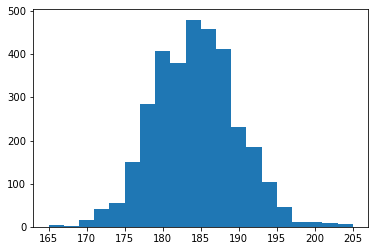

In [10]:
plt.hist(df['height'], bins=20)
plt.show()

На гистограмме видим характерное — похожее на колокол — нормальное распределение, так как мы знаем, что рост — одна из величин, которые могут распределяться нормально. Посмотрим отдельно статистики распределения роста хоккеистов.

Среднее значение:

In [11]:
df['height'].mean()

183.829386763813

Медиана:

In [12]:
df['height'].median()

184.0

Мода (специально для этого показателя предварительно округлим значения роста до целых):

In [13]:
df['height_rounded'] = df['height'].apply(round)
df['height_rounded'].head(10)

0    185
1    188
2    182
3    178
4    175
5    193
6    176
7    183
8    180
9    178
Name: height_rounded, dtype: int64

In [14]:
df['height'].mode()

0    180
dtype: int64

Видим, что значения среднего, медианы и моды достаточно близки. При большем количестве наблюдений и хорошем приближении к нормальному распределению эти величины могли бы быть приблизительно равны.

Среднее квадратичное отклонение:

In [16]:
df['height'].std()

5.467628706191668

Дисперсия:

In [17]:
df['height'].var()

29.89496366877118

#### Центральная предельная теорема

Центральные предельные теоремы — класс теорем в теории вероятностей. Они утверждают, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному.

Если у нас есть несколько выборок из генеральной совокупности (то есть из совокупности всех возможных объектов исследования), то среднее по этим выборкам также будет иметь нормальное распределение.

Другими словами, среднее достаточно большого числа независимых и нормально распределенных случайных величин также является приблизительно нормально распределенным.

Если $x_1, x_2, ..., x_n$ — случайные величины с математическим ожиданием (или средним значением) $\mu$ и стандартным отклонением $\sigma$, и при этом $n$ — большое число, то $\frac{1}{n}(x_1 + x_2 + ... + x_n)$ — приближенно нормально распределенная величина с математическим ожиданием $\mu$ и стандартным отклонением, равным $\frac{\sigma}{\sqrt(n)}$.

**Пример 2**

Из имеющегося набора данных с ростом хоккеистов сформируем 300 выборок по 10 наблюдений и рассмотрим распределение средних значений:

In [18]:
np.random.seed(42)

In [19]:
samples = []

In [20]:
for i in range(300):
    sample = df.loc[:, 'height'].sample(n=10).values
    samples.append(sample)

Вычислим средние значения для каждой выборки:

In [21]:
mean_values = []

In [22]:
for sample in samples:
    mean_values.append(sample.mean())

In [23]:
len(mean_values)

300

In [24]:
mean_values = np.array(mean_values)

In [25]:
mean_values

array([184.3, 183.8, 184.9, 182.7, 184.5, 184. , 183.5, 181. , 181.8,
       183.1, 183.9, 185.3, 183.1, 182.9, 186.1, 178.7, 184.2, 184. ,
       185.8, 186.4, 186.6, 184.1, 182.6, 185.5, 180.6, 183.3, 184.9,
       183.6, 185. , 184.8, 180.8, 187. , 184.3, 184.9, 185.5, 181.9,
       185.5, 184.7, 183.4, 186. , 186.7, 184.6, 183.1, 184.4, 180.4,
       184.5, 184.6, 187.5, 186.6, 182.1, 187.1, 183.4, 183.3, 185.4,
       181. , 183.8, 183.5, 180.4, 185. , 185.8, 186.5, 184.4, 182.3,
       184.7, 183.8, 184.1, 182.9, 185. , 184.6, 183. , 181.9, 180.2,
       184.3, 182.9, 182.6, 184.8, 183.3, 183.6, 184.2, 184.8, 182.7,
       180.6, 184.7, 185.3, 184.3, 185.3, 187.7, 184.9, 184.9, 182.7,
       184.6, 182.1, 183.4, 186.5, 186. , 183.9, 183. , 184.5, 183.1,
       188.1, 182.2, 186.4, 183.9, 182.9, 181.8, 183.8, 186.7, 184.2,
       182. , 182.8, 184.1, 182.9, 184.5, 182.9, 184.3, 184.6, 185.6,
       184.9, 185.6, 184. , 180.5, 183.6, 182.8, 183.4, 183.9, 186.2,
       181.4, 185.9,

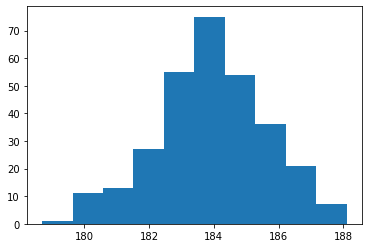

In [26]:
plt.hist(mean_values, bins=10)
plt.show()

По гистограмме видно: количество наблюдений недостаточно большое, но распределение похоже на нормальное.

# ДЗ

### №4

Text(0, 0.5, 'Probability Density')

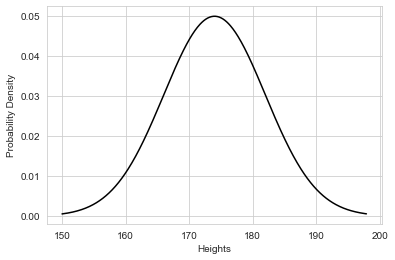

In [35]:
from scipy.stats import norm
import seaborn as sb

# Creating the distribution
data = np.arange(150,198,0.1)
pdf = norm.pdf(data , loc = 174 , scale = 8 )

#Visualizing the distribution

sb.set_style('whitegrid')
sb.lineplot(data, pdf , color = 'black')
plt.xlabel('Heights')
plt.ylabel('Probability Density')

In [42]:
# а)
a = 182 
mean = 174 
std = 8
P = 1 - norm(loc = mean , scale = std).cdf(a)
print(f'P(x>{a}) = {round(P*100, 4)}%')

P(x>182) = 15.8655%


In [43]:
# б)
a = 190 
mean = 174 
std = 8
P = 1 - norm(loc = mean , scale = std).cdf(a)
print(f'P(x>{a}) = {round(P*100, 4)}%')

P(x>190) = 2.275%


In [44]:
# в)
a = 166
b = 190
mean = 174 
std = 8
P = norm(loc = mean , scale = std).cdf(b) - norm(loc = mean , scale = std).cdf(a)
print(f'P({a}<x<{b}) = {round(P*100, 4)}%')

P(166<x<190) = 81.8595%


In [45]:
# г)
a = 166
b = 182
mean = 174 
std = 8
P = norm(loc = mean , scale = std).cdf(b) - norm(loc = mean , scale = std).cdf(a)
print(f'P({a}<x<{b}) = {round(P*100, 4)}%')

P(166<x<182) = 68.2689%


In [46]:
# д)
a = 158
b = 190
mean = 174 
std = 8
P = norm(loc = mean , scale = std).cdf(b) - norm(loc = mean , scale = std).cdf(a)
print(f'P({a}<x<{b}) = {round(P*100, 4)}%')

P(158<x<190) = 95.45%


In [47]:
# е)
a = 150
b = 190
mean = 174 
std = 8
P = 1 - norm(loc = mean , scale = std).cdf(b) + norm(loc = mean , scale = std).cdf(a)
print(f'P({a}<x>{b}) = {round(P*100, 4)}%')

P(150<x>190) = 2.41%


In [48]:
# ё)
a = 150
b = 198
mean = 174 
std = 8
P = 1 - norm(loc = mean , scale = std).cdf(b) + norm(loc = mean , scale = std).cdf(a)
print(f'P({a}<x>{b}) = {round(P*100, 4)}%')

P(150<x>198) = 0.27%


In [50]:
a = 166
mean = 174 
std = 8
P = norm(loc = mean , scale = std).cdf(a)
print(f'P(x<{a}) = {round(P*100, 4)}%')

P(x<166) = 15.8655%
